In [45]:
import re, sys, os, yaml
import numpy as np
import pandas as pd
from time import time

sys.path.append('..')
from preprocess.utils import TextConverter, IOHelper
from preprocess.data import TextDataForTC
from preprocess.build_feature import TextHeteroGraphBuilder

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [6]:
def read_file(file_dir):
    result = []
    with open(file_dir, 'r', encoding='latin1') as f:
        for line in f:
            result.append(line.strip())
    return result

### R20
---

In [51]:
start = time()
# parse config
config_file = 'config.yaml'
config = yaml.load(open(config_file), Loader=yaml.FullLoader)
data_root_dir = config['preprocess']['data_root_dir']
dataset = config['preprocess']['dataset']

# generate text data
text_data = TextDataForTC(config_file, dataset)
# generate feature and label data [x, y, tx, ty, allx, ally]
label2idx = text_data.get_label2idx()
vocab = text_data.get_vocab()
word2idx = vocab.get_word2idx()

In [52]:
vars(text_data).keys()

dict_keys(['remove_stop_words', 'train_random_seed', 'test_random_seed', 'val_split_ratio', 'train_data_dir', 'test_data_dir', 'min_word_freq', 'embed_dim', 'word_freq', 'label2idx', 'raw_text_ls_train', 'label_ls_train', 'preprocessed_text_ls_train', 'raw_text_ls_test', 'label_ls_test', 'preprocessed_text_ls_test', 'stopwords', 'vocab', 'raw_text_ls_val', 'label_ls_val', 'preprocessed_text_ls_val'])

In [53]:
text_train = text_data.preprocessed_text_ls_train
label_train = text_data.label_ls_train

In [54]:
sent_len = np.array(list(map(lambda x: len(x.split()), text_train)))
print("mean document length: ", sent_len.mean())
print("median document length: ", np.median(sent_len))
print("min document length: ", sent_len.min())
print("max document length: ", sent_len.max())

mean document length:  353.7782361029267
median document length:  203.0
min document length:  18
max document length:  18722


In [59]:
np.quantile(sent_len, 0.95)

868.9499999999989

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


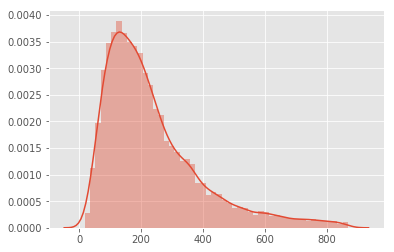

In [61]:
sns.distplot(sent_len[sent_len<869])

### MR
---

In [46]:
start = time()
# parse config
config_file = 'config_mr.yaml'
config = yaml.load(open(config_file), Loader=yaml.FullLoader)
data_root_dir = config['preprocess']['data_root_dir']
dataset = config['preprocess']['dataset']

# generate text data
text_data = TextDataForTC(config_file, dataset)
# generate feature and label data [x, y, tx, ty, allx, ally]
label2idx = text_data.get_label2idx()
vocab = text_data.get_vocab()
word2idx = vocab.get_word2idx()

In [47]:
text_train = text_data.preprocessed_text_ls_train
label_train = text_data.label_ls_train

In [48]:
sent_len = np.array(list(map(lambda x: len(x.split()), text_train)))
print("mean document length: ", sent_len.mean())
print("median document length: ", np.median(sent_len))
print("min document length: ", sent_len.min())
print("max document length: ", sent_len.max())

mean document length:  12.292480850398624
median document length:  12.0
min document length:  1
max document length:  37


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


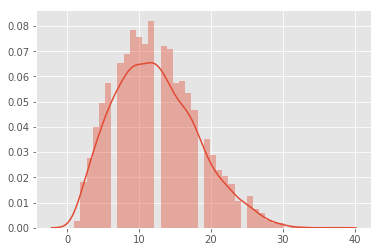

In [50]:
sns.distplot(sent_len)